# Testing colors for SDWA mass/year figure
## Instructions
Before you run these cells, download the [data file](https://drive.google.com/file/d/102j4eaGiBgeOaW1uzZcZ-T2VEBzskvYX/view?usp=sharing) to your computer.  Save it somewhere convenient.  

After that, run the next cell by clicking the ▶ button.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker
from pylab import gca, mpl
import seaborn as sns; sns.set_theme()
# from google.colab import files

Before you run the next cell:
- click on the folder icon on the far left of the colab page.  
- click on the upload icon.
- select and upload the 'data_for_big_figure.csv' file that you previously downloaded. It should show up in the "Files" panel.

Now you can run the next cell.

In [2]:
big = pd.read_csv("data_for_big_figure.csv")  
# big.head()

In [3]:
# maxes = nonbtex.max().drop('date',axis=0)
maxes = big.max().drop('date',axis=0)
maxes = maxes.sort_values(ascending=False)
#print(maxes)
breaks = [2,11]
biggest = maxes[:breaks[0]].index.tolist()
#biggest
middle = maxes[breaks[0]:breaks[1]].index.tolist()
#middle
smallest = maxes[breaks[1]:].index.tolist()
tiny = smallest[5:]
lump = []
for i,row in big.iterrows():
    accum = 0
    for chem in tiny:
        accum += row[chem]
    lump.append(accum)
big['remaining 10 \nSDWA chemicals'] = lump
trimmed_smallest = smallest[:5]
trimmed_smallest.append('remaining 10 \nSDWA chemicals')

## notes:
The "cmap" variable in the plot statements is what controls the colormap of the graph.  Change it and press ▶ again to see the results.

You can have a different cmap for each panel.
 
The format of the plot below isn't identical to what we've developed so far. Ignore that - this is just for judging color schemes.

# Using colormaps


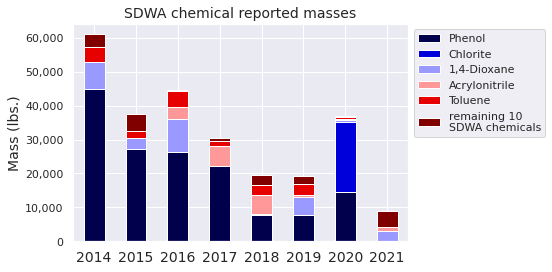

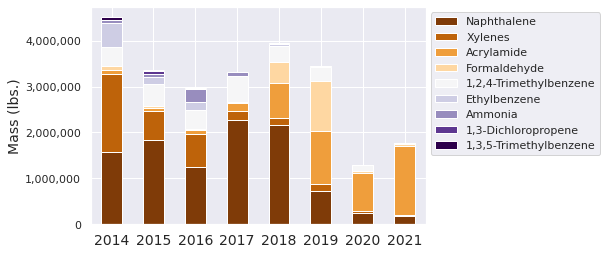

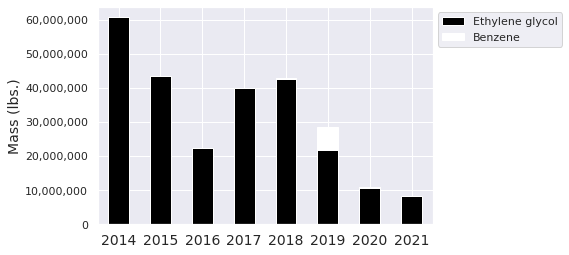

In [ ]:
big.plot.bar('date',trimmed_smallest,stacked=True,cmap='seismic')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
ax = gca().yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.title('SDWA chemical reported masses',fontsize=14)
plt.xticks(fontsize=14,rotation = 0);
plt.ylabel('Mass (lbs.)',fontsize=14);
plt.xlabel('');

plt.show()

big.plot.bar('date',middle,stacked=True,cmap='PuOr')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.xticks(fontsize=14,rotation = 0);
plt.ylabel('Mass (lbs.)',fontsize=14);
plt.xlabel('');
ax = gca().yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

big.plot.bar('date',biggest,stacked=True,cmap='afmhot')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.xticks(fontsize=14,rotation = 0);
plt.ylabel('Mass (lbs.)',fontsize=14);
plt.xlabel('');
ax = gca().yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()
# 

# Using lists of individual colors

We can do this by simply supplying a list of colors that the programs cycles through as it plots.  Below cl1, etc, has the specified color list.  See [Specifying Colors](https://matplotlib.org/stable/tutorials/colors/colors.html) for codes you can use and somewhere this is a more specific "color picker" tool.  I think the those codes in the form of #xxxxxxx are pretty standard.

## line thickness
change the "linewidth" parameter in the "big.plot.bar" code. 

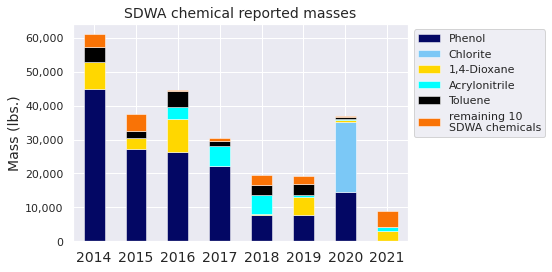

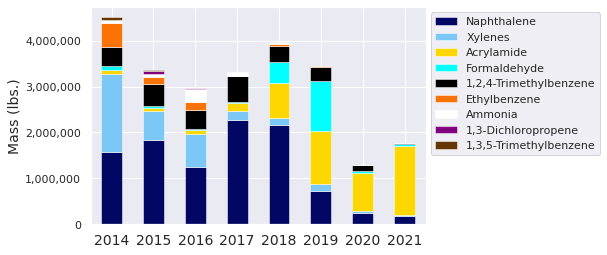

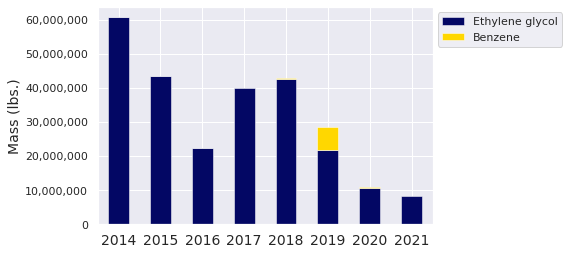

In [17]:

cl1 =['#030764', '#7BC8F6', '#FFD700', '#00FFFF', '#000000','#F97306'] # <<<<< change colors here

ax = big.plot.bar('date',trimmed_smallest,stacked=True,color=cl1, linewidth=0.5)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
ax = gca().yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.title('SDWA chemical reported masses',fontsize=14)
plt.xticks(fontsize=14,rotation = 0);
plt.ylabel('Mass (lbs.)',fontsize=14);
plt.xlabel('');

plt.show()

cl2 =['#030764', '#7BC8F6', '#FFD700', '#00FFFF', '#000000', '#F97306', 
      '#FFFFFF', '#800080', '#653700', '#E6E6FA'] # <<<<< change colors here

big.plot.bar('date',middle,stacked=True,color=cl2, linewidth=0.5)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.xticks(fontsize=14,rotation = 0);
plt.ylabel('Mass (lbs.)',fontsize=14);
plt.xlabel('');
ax = gca().yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

cl3 =['#030764','#FFD700'] # <<<<< change colors here
big.plot.bar('date',biggest,stacked=True,color=cl3, linewidth=0.5)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.xticks(fontsize=14,rotation = 0);
plt.ylabel('Mass (lbs.)',fontsize=14);
plt.xlabel('');
ax = gca().yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()
# 